In [60]:
import requests
import http.client
import pandas as pd
from pprint import pprint
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import csv

In [44]:
import io
import base64
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


In [45]:

SPOTIPY_CLIENT_ID = '2ea0f380d0794b2a9d705ac2b9feac6a'
SPOTIPY_CLIENT_SECRET = 'c80f9cc3dc2443fbb458ee7f428535c7'

os.environ['SPOTIPY_CLIENT_SECRET'] = SPOTIPY_CLIENT_SECRET
os.environ['SPOTIPY_CLIENT_ID'] = SPOTIPY_CLIENT_ID


In [46]:
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

In [47]:
cat_data = dict()
tracks1 = []
urls1 = []
uris1 = []
names1 = []

cats = ['country','edm_dance','hiphop','pop','latin']
for c in cats:
    urls = [x['external_urls']['spotify'] for x in sp.category_playlists(c,country='US',limit=50,offset=0)['playlists']['items']]
    uris = [x['uri'] for x in sp.category_playlists(c,country='US',limit=50,offset=0)['playlists']['items']]
    names = [x['name'] for x in sp.category_playlists(c,country='US',limit=50,offset=0)['playlists']['items']]
#     print(len(urls))
#     print(len(uris))
#     print(len(names))
    total_data = []
    for i in range(len(urls)):
        cur_dict = {}
        cur_url = urls[i]
        cur_uri = uris[i]
        cur_nam = names[i]
# #         cur_total = (sp.playlist_tracks(playlist_id=uri))['total']
#         print(cur_total)
        cur_dict['url'] = cur_url
        cur_dict['uri'] = cur_uri
        cur_dict['name'] = cur_nam
# #         cur_dict['total_tracks'] = cur_total
        total_data.append(cur_dict)

    df6 = pd.DataFrame(total_data)
    df6['tracks'] = ''
    df6['category'] = c
    for index, row in df6.iterrows():
        uri = row['uri']
#         print("hello")
        tracks = row['tracks']
#         print("hello2")
        playlist_tracks = (sp.playlist_tracks(playlist_id=uri))['total']
#         print("hello3")
        df6.loc[index, "tracks"] = playlist_tracks
#         print("hello4")
    print(df6)
    df6.to_csv(f'final_data.csv',index=False)
#     print("hello5")


                                                  url  \
0   https://open.spotify.com/playlist/37i9dQZF1DX1...   
1   https://open.spotify.com/playlist/37i9dQZF1DWW...   
2   https://open.spotify.com/playlist/37i9dQZF1DWU...   
3   https://open.spotify.com/playlist/37i9dQZF1DX0...   
4   https://open.spotify.com/playlist/37i9dQZF1DWT...   
5   https://open.spotify.com/playlist/37i9dQZF1DWV...   
6   https://open.spotify.com/playlist/37i9dQZF1DXd...   
7   https://open.spotify.com/playlist/37i9dQZF1DXb...   
8   https://open.spotify.com/playlist/37i9dQZF1DWX...   
9   https://open.spotify.com/playlist/37i9dQZF1DWY...   
10  https://open.spotify.com/playlist/37i9dQZF1DXc...   
11  https://open.spotify.com/playlist/37i9dQZF1DX7...   
12  https://open.spotify.com/playlist/37i9dQZF1DX8...   
13  https://open.spotify.com/playlist/37i9dQZF1DXa...   
14  https://open.spotify.com/playlist/37i9dQZF1DX8...   
15  https://open.spotify.com/playlist/37i9dQZF1DX6...   
16  https://open.spotify.com/pl

                                                  url  \
0   https://open.spotify.com/playlist/37i9dQZF1DX4...   
1   https://open.spotify.com/playlist/37i9dQZF1DX8...   
2   https://open.spotify.com/playlist/37i9dQZF1DWX...   
3   https://open.spotify.com/playlist/37i9dQZF1DWV...   
4   https://open.spotify.com/playlist/37i9dQZF1DXa...   
5   https://open.spotify.com/playlist/37i9dQZF1DWS...   
6   https://open.spotify.com/playlist/37i9dQZF1DX4...   
7   https://open.spotify.com/playlist/37i9dQZF1DX0...   
8   https://open.spotify.com/playlist/37i9dQZF1DX0...   
9   https://open.spotify.com/playlist/37i9dQZF1DX6...   
10  https://open.spotify.com/playlist/37i9dQZF1DWX...   
11  https://open.spotify.com/playlist/37i9dQZF1DXc...   
12  https://open.spotify.com/playlist/37i9dQZF1DXa...   
13  https://open.spotify.com/playlist/37i9dQZF1DX0...   
14  https://open.spotify.com/playlist/37i9dQZF1DWW...   
15  https://open.spotify.com/playlist/37i9dQZF1DXd...   
16  https://open.spotify.com/pl

                                                  url  \
0   https://open.spotify.com/playlist/37i9dQZF1DXc...   
1   https://open.spotify.com/playlist/37i9dQZF1DX0...   
2   https://open.spotify.com/playlist/37i9dQZF1DWU...   
3   https://open.spotify.com/playlist/37i9dQZF1DX2...   
4   https://open.spotify.com/playlist/37i9dQZF1DWW...   
5   https://open.spotify.com/playlist/37i9dQZF1DXb...   
6   https://open.spotify.com/playlist/37i9dQZF1DX4...   
7   https://open.spotify.com/playlist/37i9dQZF1DX0...   
8   https://open.spotify.com/playlist/37i9dQZF1DWT...   
9   https://open.spotify.com/playlist/37i9dQZF1DX0...   
10  https://open.spotify.com/playlist/37i9dQZF1DX5...   
11  https://open.spotify.com/playlist/37i9dQZF1DX6...   
12  https://open.spotify.com/playlist/37i9dQZF1DX6...   
13  https://open.spotify.com/playlist/37i9dQZF1DXa...   
14  https://open.spotify.com/playlist/37i9dQZF1DWY...   
15  https://open.spotify.com/playlist/37i9dQZF1DXc...   
16  https://open.spotify.com/pl

In [48]:

os.chdir("../project2/data_gathering")

FileNotFoundError: [Errno 2] No such file or directory: '../project2/data_gathering'

In [49]:
!pwd

/Users/Q/Desktop/jeff/Project2/project2/data_gathering


In [50]:
!ls

country.csv                hiphop.csv
edm_dance.csv              latin.csv
final_data.csv             pop.csv
final_data_gathering.ipynb


In [51]:
file_extension = '.csv'
all_playlist = [i for i in glob.glob(f"*{file_extension}")]

In [52]:
print(f"These are all the filenames I want {all_playlist}.")

These are all the filenames I want ['edm_dance.csv', 'latin.csv', 'final_data.csv', 'pop.csv', 'country.csv', 'hiphop.csv'].


In [53]:
all_playlist[0]

'edm_dance.csv'

In [54]:
print (all_playlist)

['edm_dance.csv', 'latin.csv', 'final_data.csv', 'pop.csv', 'country.csv', 'hiphop.csv']


In [61]:
final_list_csv = pd.concat([pd.read_csv(f,header=None) for f in all_playlist])

In [66]:
final_list_csv.to_csv( "all_playlist.csv", quotechar='"', 
quoting=csv.QUOTE_ALL, index=False, encoding='utf-8')

In [73]:
print (all_playlist.csv)

AttributeError: 'list' object has no attribute 'csv'

In [57]:
all_playlist_df = pd.read_csv('edm_dance.csv', delimiter='t', encoding='UTF-16')

UnicodeError: UTF-16 stream does not start with BOM

In [25]:
all_playlist.drop(columns=['final_data.csv', 'all_data.csv'])

AttributeError: 'list' object has no attribute 'drop'

In [ ]:
# df6 = pd.DataFrame(total_data)
# df6['tracks'] = ''

# for index, row in df6.iterrows():
# uri = row['uri']
# tracks = row['tracks']
# playlist_tracks = (sp.playlist_tracks(playlist_id=uri))['total']
# df6.loc[index, "tracks"] = playlist_tracks

In [ ]:
# df6 = pd.DataFrame(total_data)


In [74]:
final_list_csv.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [20]:
df_latin_playlist=pd.read_csv('latin.csv')
df_latin_playlist

,url,uri,name,tracks,category
0,https://open.spotify.com/playlist/37i9dQZF1DXb...,spotify:playlist:37i9dQZF1DXb0COFso7q0D,Los Que Mandan: Top 40,40,latin
1,https://open.spotify.com/playlist/37i9dQZF1DX1...,spotify:playlist:37i9dQZF1DX10zKzsJ2jva,¡Viva Latino!,50,latin
2,https://open.spotify.com/playlist/37i9dQZF1DWY...,spotify:playlist:37i9dQZF1DWY7IeIP1cdjF,Baila Reggaeton,50,latin
3,https://open.spotify.com/playlist/37i9dQZF1DX1...,spotify:playlist:37i9dQZF1DX1hVRardJ30X,New Music Friday Latin,59,latin
4,https://open.spotify.com/playlist/37i9dQZF1DX4...,spotify:playlist:37i9dQZF1DX4OjfOteYnH8,Urbano Rising,55,latin
5,https://open.spotify.com/playlist/37i9dQZF1DX2...,spotify:playlist:37i9dQZF1DX2MJVTOdWtbm,Are & Be Latin,85,latin
6,https://open.spotify.com/playlist/37i9dQZF1DWZ...,spotify:playlist:37i9dQZF1DWZoF06RIo9el,Future Hits: Latin,50,latin
7,https://open.spotify.com/playlist/37i9dQZF1DWY...,spotify:playlist:37i9dQZF1DWYzQ2Vx5M6uV,Afro Ritmo,54,latin
8,https://open.spotify.com/playlist/37i9dQZF1DX5...,spotify:playlist:37i9dQZF1DX5AVYhCeISA6,Inspiring Latinas,75,latin
9,https://open.spotify.com/playlist/37i9dQZF1DXb...,spotify:playlist:37i9dQZF1DXbSwbJpH6lAw,Radar US Latin,30,latin


Text(0.5, 1.0, 'Latin Playlist')

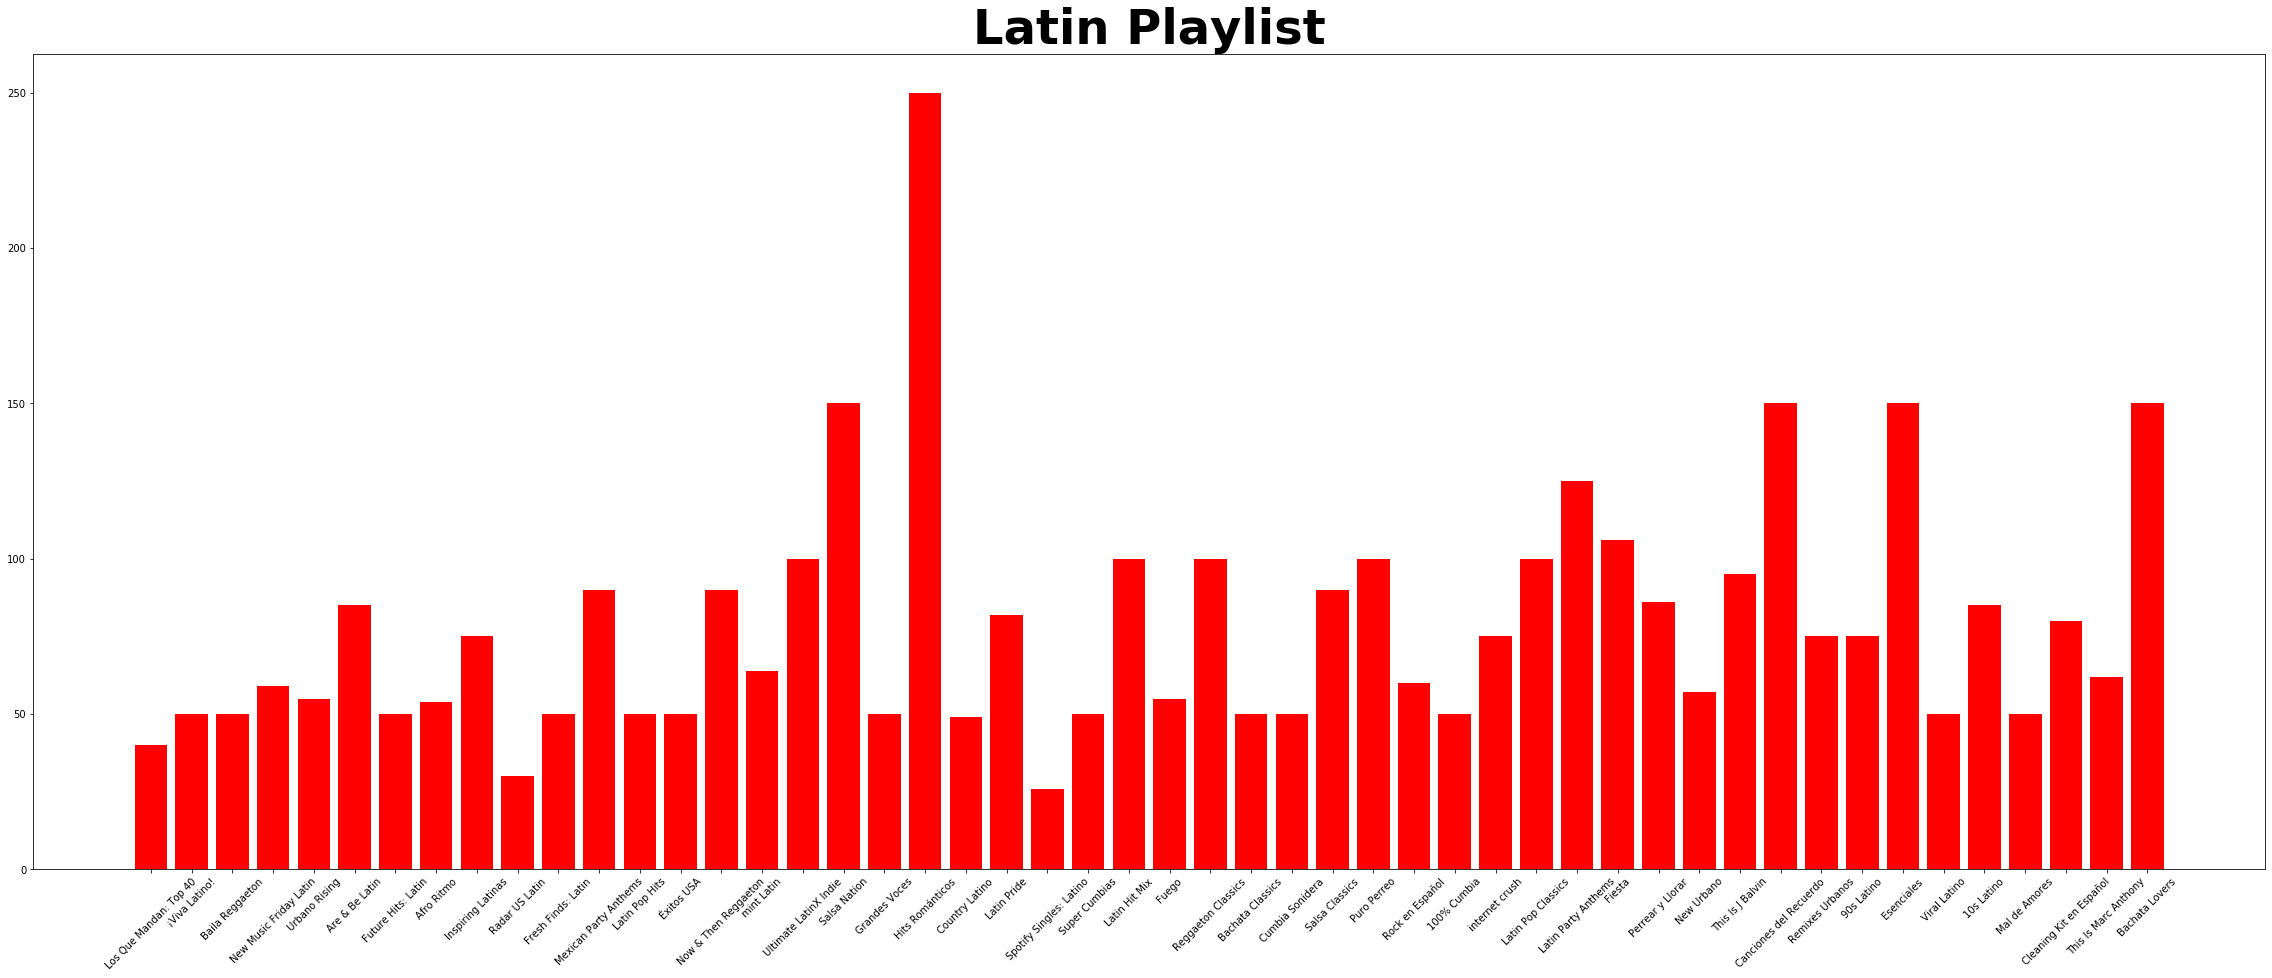

In [21]:
plt.figure(figsize=(40,15))
plt.bar(x=df_latin_playlist['name'],
 
        height=df_latin_playlist['tracks'],
        color = 'red')
plt.xticks(rotation = 45)
plt.title('Latin Playlist', fontsize=48, fontweight='bold')


In [ ]:
df_country=pd.read_csv('country.csv')
df_country

In [ ]:
plt.figure(figsize=(40,15))
plt.bar(x=df_country['name'],
 
        height=df_latin_playlist['tracks'],
        color = 'brown')
plt.xticks(rotation = 45)
plt.title('Country Playlist', fontsize=48, fontweight='bold')

In [ ]:
df_edm=pd.read_csv('edm_dance.csv')
df_edm

In [ ]:
plt.figure(figsize=(40,15))
plt.bar(x=df_edm['name'],
 
        height=df_edm['tracks'],
        color = 'green')
plt.xticks(rotation = 45)
plt.title('EDM Playlist', fontsize=48, fontweight='bold')

In [ ]:
df_hiphop=pd.read_csv('hiphop.csv')
df_hiphop

In [ ]:
plt.figure(figsize=(40,15))
plt.bar(x=df_hiphop['name'],
 
        height=df_hiphop['tracks'],
        color = 'orange')
plt.xticks(rotation = 45)
plt.title('Hip Hop Playlist', fontsize=48, fontweight='bold')

In [ ]:
df_pop=pd.read_csv('pop.csv')
df_pop

In [ ]:
plt.figure(figsize=(40,15))
plt.bar(x=df_pop['name'],
 
        height=df_pop['tracks'],
        color = 'purple')
plt.xticks(rotation = 45)
plt.title('Pop Playlist', fontsize=48, fontweight='bold')